In [1]:
!pip install tensorflow
!pip install yfinance
!pip install pandas_datareader
!pip install datetime
!pip instaall 
!pip install keras

ERROR: unknown command "instaall" - maybe you meant "install"


In [2]:
import numpy as np
from numpy import append
import tensorflow as tf
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import datetime  
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import pandas as pd
import datetime
from datetime import date

In [3]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from sklearn.preprocessing import StandardScaler

In [4]:


df_VOO = pd.read_csv('gs://ml-investiment-input-pipeline/VOO (9).csv' ,index_col='Date', parse_dates=True)


df_VIX = pd.read_csv('gs://ml-investiment-input-pipeline/^VIX (2).csv' ,index_col='Date', parse_dates=True)


df1 = pd.read_csv('gs://ml-investiment-input-pipeline/daily-treasury-rates (8).csv',index_col='Date', parse_dates=True)

df_Tr = df1.iloc[::-1]

In [5]:


df_Tr.head()


,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-01-03,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
2023-01-04,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2023-01-05,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
2023-01-06,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
2023-01-09,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [6]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300


In [ ]:
df_VOO.tail()

In [ ]:
df_Tr.tail()

In [7]:
df_VIX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,23.090000,23.76,22.730000,22.900000,22.900000,0.0
2023-01-04,22.930000,23.27,21.940001,22.010000,22.010000,0.0
2023-01-05,22.200001,22.92,21.969999,22.459999,22.459999,0.0
2023-01-06,22.690001,22.90,21.000000,21.129999,21.129999,0.0
2023-01-09,21.750000,21.98,21.270000,21.969999,21.969999,0.0


In [20]:
df_VIX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-06,14.91,14.97,13.95,13.96,13.96,0.0
2023-06-07,14.14,14.29,13.77,13.94,13.94,0.0
2023-06-08,14.14,14.21,13.53,13.65,13.65,0.0
2023-06-09,13.78,14.14,13.50,13.83,13.83,0.0
2023-06-12,14.44,15.02,14.32,15.01,15.01,0.0


In [55]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return,log_returns
Date,,,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN,NaN,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,349.989990,0.007200,0.007174
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,352.510010,-0.010922,-0.010982
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,348.660004,0.022744,0.022489
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,356.589996,-0.000729,-0.000729


In [23]:
df_Tr = df_Tr.pct_change(1)

df_Tr.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.007194,0.000000,0.004415,-0.002128,0.000000,-0.002119,-0.009091,-0.016746,-0.022843,-0.025707,-0.026385,-0.022167,-0.018041
2023-01-05,0.023810,0.029412,0.024176,0.012793,0.008386,0.014862,0.020642,0.017032,0.012987,0.007916,0.005420,-0.002519,-0.007874
2023-01-06,0.004651,0.000000,0.002146,-0.002105,-0.004158,-0.014644,-0.047191,-0.052632,-0.053846,-0.049738,-0.043127,-0.030303,-0.029101
2023-01-09,0.011574,0.006593,0.006424,0.000000,0.008351,-0.004246,-0.011792,-0.007576,-0.008130,-0.008264,-0.005634,-0.002604,-0.002725


In [56]:
df_VOO['PrevClose'] = df_VOO['Close'].shift(1)
df_VOO['Return'] = (df_VOO['Close'] - df_VOO['PrevClose']) / df_VOO['PrevClose']
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return,log_returns
Date,,,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN,NaN,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,349.989990,0.007200,0.007174
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,352.510010,-0.010922,-0.010982
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,348.660004,0.022744,0.022489
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,356.589996,-0.000729,-0.000729


<AxesSubplot: >

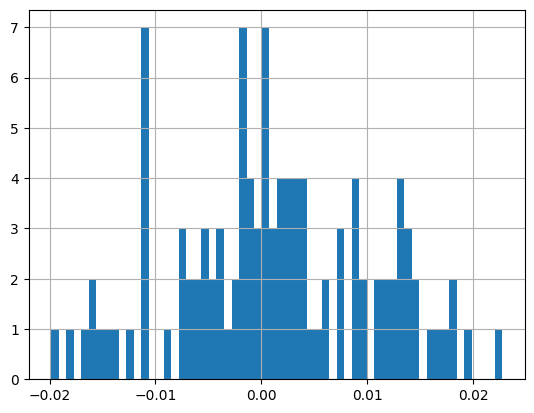

In [57]:
df_VOO['Return'].hist(bins=60)

In [58]:
df_VOO['Return'].mean(), df_VOO['Return'].std()

(0.00122731503328615, 0.009314443547750845)

array([[<AxesSubplot: title={'center': '1 Mo'}>,
        <AxesSubplot: title={'center': '2 Mo'}>,
        <AxesSubplot: title={'center': '3 Mo'}>,
        <AxesSubplot: title={'center': '4 Mo'}>],
       [<AxesSubplot: title={'center': '6 Mo'}>,
        <AxesSubplot: title={'center': '1 Yr'}>,
        <AxesSubplot: title={'center': '2 Yr'}>,
        <AxesSubplot: title={'center': '3 Yr'}>],
       [<AxesSubplot: title={'center': '5 Yr'}>,
        <AxesSubplot: title={'center': '7 Yr'}>,
        <AxesSubplot: title={'center': '10 Yr'}>,
        <AxesSubplot: title={'center': '20 Yr'}>],
       [<AxesSubplot: title={'center': '30 Yr'}>,
        <AxesSubplot: title={'center': 'log_returns'}>,
        <AxesSubplot: title={'center': 'delta_VIX'}>, <AxesSubplot: >]],
      dtype=object)

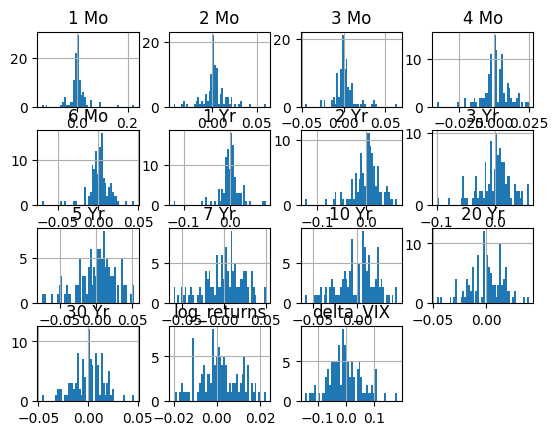

In [59]:
df_Tr.hist(bins=50)

In [ ]:
df_Tr['10 Yr'].hist(bins=50)

In [ ]:
df_Tr.describe()

<AxesSubplot: xlabel='Date'>

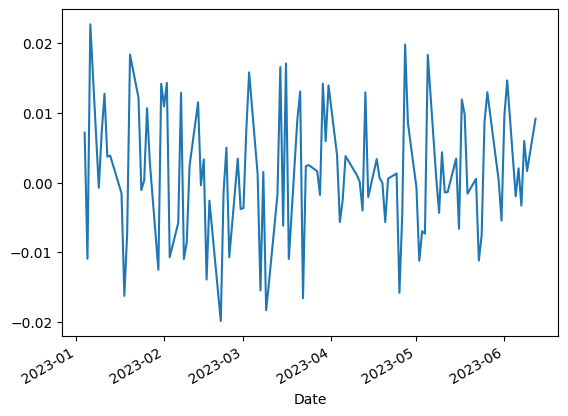

In [27]:
df_VOO['Return'].plot()

In [60]:
df_VOO['log_returns'] = np.log(df_VOO['Return'] + 1)     

In [61]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return,log_returns
Date,,,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN,NaN,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,349.989990,0.007200,0.007174
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,352.510010,-0.010922,-0.010982
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,348.660004,0.022744,0.022489
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,356.589996,-0.000729,-0.000729


In [62]:
df_Tr['log_returns'] = df_VOO['log_returns']
df_Comp =df_Tr
df_Comp['delta_VIX'] = df_VIX['Close'].pct_change(1)
df_Comp.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,log_returns,delta_VIX
Date,,,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.007194,0.000000,0.004415,-0.002128,0.000000,-0.002119,-0.009091,-0.016746,-0.022843,-0.025707,-0.026385,-0.022167,-0.018041,0.007174,-0.038865
2023-01-05,0.023810,0.029412,0.024176,0.012793,0.008386,0.014862,0.020642,0.017032,0.012987,0.007916,0.005420,-0.002519,-0.007874,-0.010982,0.020445
2023-01-06,0.004651,0.000000,0.002146,-0.002105,-0.004158,-0.014644,-0.047191,-0.052632,-0.053846,-0.049738,-0.043127,-0.030303,-0.029101,0.022489,-0.059216
2023-01-09,0.011574,0.006593,0.006424,0.000000,0.008351,-0.004246,-0.011792,-0.007576,-0.008130,-0.008264,-0.005634,-0.002604,-0.002725,-0.000729,0.039754


(-0.002098650588960438, 0.058740277610500755)

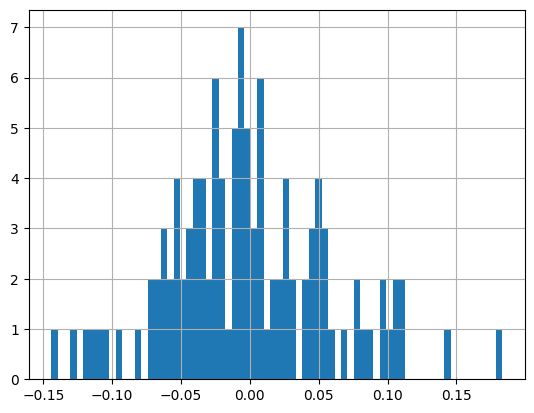

In [63]:
df_Comp['delta_VIX'].hist(bins=70)
df_Comp['delta_VIX'].mean(), df_Comp['delta_VIX'].std()

In [46]:
df_VOO['PrevClose'] = df_VOO['Close'].shift(1)
df_VOO['Return'] = (df_VOO['Close'] - df_VOO['PrevClose']) / df_VOO['PrevClose']
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,PrevClose,Return,log_returns
Date,,,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN,NaN,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,349.989990,0.007200,0.007174
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,352.510010,-0.010922,-0.010982
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,348.660004,0.022744,0.022489
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,356.589996,-0.000729,-0.000729


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

<AxesSubplot: >

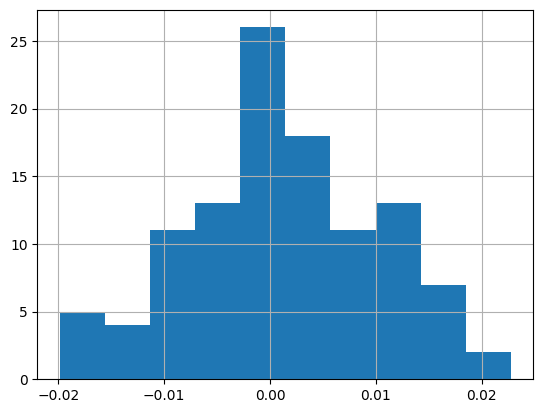

In [64]:
df_VOO['Return'].hist()

In [65]:
# Start by doing the WRONG thing - trying to predict the price itself
series = df_VOO['log_returns'].values.reshape(-1, 1)

In [66]:
series = df_VOO['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [67]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (100, 10, 1) Y.shape (100,)


In [68]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
2/2 [==============================] - 2s 778ms/step - loss: 0.9183 - val_loss: 0.5028
Epoch 2/80
2/2 [==============================] - 0s 30ms/step - loss: 0.9188 - val_loss: 0.5035
Epoch 3/80
2/2 [==============================] - 0s 29ms/step - loss: 0.9125 - val_loss: 0.5009
Epoch 4/80
2/2 [==============================] - 0s 30ms/step - loss: 0.9115 - val_loss: 0.4984
Epoch 5/80
2/2 [==============================] - 0s 29ms/step - loss: 0.9109 - val_loss: 0.4967
Epoch 6/80
2/2 [==============================] - 0s 29ms/step - loss: 0.9088 - val_loss: 0.4967
Epoch 7/80
2/2 [==============================] - 0s 28ms/step - loss: 0.9052 - val_loss: 0.4960
Epoch 8/80
2/2 [==============================] - 0s 29ms/step - loss: 0.9015 - val_loss: 0.4944
Epoch 9/80
2/2 [==============================] - 0s 27ms/step - loss: 0.9003 - val_loss: 0.4934
Epoch 10/80
2/2 [==============================] - 0s 28ms/step - loss: 0.8972 - val_loss: 0.4940
Epoch 11/80
2/2 [===========

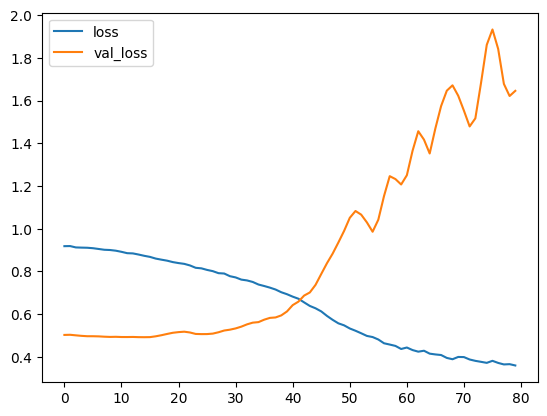

In [69]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(100, 1)


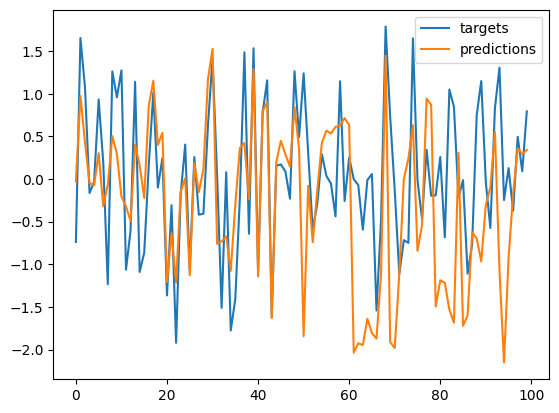

In [70]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

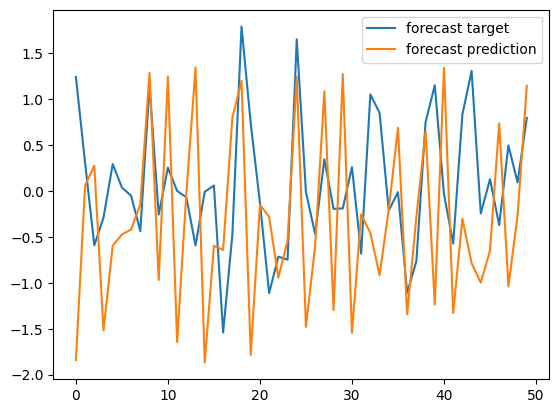

In [71]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()